## PHÂN TÍCH DỮ LIỆU TIỀN MÃ HÓA

### 1. Lấy Data Crypto từ trang web *coinmarketcap.com* với API Key


In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start': 1,
    'limit': 100,
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '29c45bed-b7d1-44cd-8ef6-851711e8c305'
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
    # Kết quả in ra là file JSON chứa dữ liệu Crypto 
except (ConnectionError, Timeout, TooManyRedirects) as err:
    print(err)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# Show tất cả các trường dữ liệu
pd.set_option('display.max_columns', None)

In [4]:
# Chuyển file JSON sang dạng dataframe
df = pd.json_normalize(data['data']).head(10)
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11964,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983151e+07,1.983151e+07,False,NaN,1,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,92973.111086,6.774444e+10,161.3069,0.039572,8.196380,-2.812146,-9.196244,-2.442036,-3.283368,1.843797e+12,59.8467,1.952435e+12,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9956,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205877e+08,1.205877e+08,True,NaN,2,NaN,NaN,NaN,2025-03-03T06:19:00.000Z,2434.531749,3.786554e+10,162.8534,-0.544051,9.724886,-10.460819,-26.181911,-28.373283,-33.515258,2.935747e+11,9.5201,2.935747e+11,NaN,2025-03-03T06:19:00.000Z,NaN,NaN,NaN,NaN,NaN
2,52,XRP,XRP,xrp,1543,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,2.789868,1.916418e+10,496.6810,-0.723334,23.610092,12.443669,-8.472855,18.210255,2.431571,1.616721e+11,5.2427,2.789868e+11,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether USDt,USDT,tether,118152,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.424359e+11,1.445642e+11,True,NaN,4,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,0.999660,1.481057e+11,166.8483,-0.008188,0.017950,-0.067599,-0.044642,0.138325,-0.053343,1.423875e+11,4.6217,1.445151e+11,NaN,2025-03-03T06:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,1839,BNB,BNB,bnb,2377,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424759e+08,1.424759e+08,False,NaN,5,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,609.323418,2.286916e+09,43.3914,-0.577312,0.246753,-5.365155,-9.966265,-13.538908,-7.474567,8.681390e+10,2.8152,8.681390e+10,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,844,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.076565e+08,5.952859e+08,True,NaN,6,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,168.188967,1.254215e+10,362.9173,-1.061024,17.929731,5.820732,-27.297840,-17.592895,-26.637146,8.538222e+10,2.7688,1.001205e+11,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25992,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.634777e+10,5.634777e+10,False,NaN,7,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,0.999923,1.490415e+10,200.2159,0.010702,0.011660,-0.025919,-0.034899,-0.010235,-0.001416,5.634345e+10,1.8271,5.634345e+10,NaN,2025-03-03T06:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,2010,Cardano,ADA,cardano,1468,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,1.045517,9.263437e+09,1471.9108,-1.802362,58.053614,41.125355,10.312446,12.610898,-19.472720,3.681520e+10,1.1938,4.704828e+10,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1172,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.482708e+11,1.482708e+11,True,NaN,9,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,0.226381,3.720137e+09,258.7414,-0.683552,10.235516,-2.414239,-30.952703,-31.422766,-46.582821,3.356563e+10,1.0895,3.356563e+10,NaN,2025-03-03T06:20:0

* Bonus: Tạo hàm tự động call API lấy Data Crypto 

In [ ]:
def api_runner():

    global df 
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': 1,
        'limit': 100,
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '29c45bed-b7d1-44cd-8ef6-851711e8c305'
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as err:
        print(err)


    df2 = pd.json_normalize(data['data'])
    df = df.append(df2)    

In [ ]:
import os
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('API call successfully.')
    sleep(60) #sleep for 1 minute
exit()

### 2. Data Transforming

In [7]:
# Chuyển dữ liệu kiểu float từ dạng ký hiệu khoa học sang dạng thập phân lấy 3 chữ số sau dấu phẩy
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11964,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19831512.000,19831512.000,False,NaN,1,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,92973.111,67744438632.578,161.307,0.040,8.196,-2.812,-9.196,-2.442,-3.283,1843797368185.132,59.847,1952435332812.130,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9956,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120587727.219,120587727.219,True,NaN,2,NaN,NaN,NaN,2025-03-03T06:19:00.000Z,2434.532,37865538723.151,162.853,-0.544,9.725,-10.461,-26.182,-28.373,-33.515,293574650425.562,9.520,293574650425.560,NaN,2025-03-03T06:19:00.000Z,NaN,NaN,NaN,NaN,NaN
2,52,XRP,XRP,xrp,1543,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.000,57949738512.000,99986390660.000,False,NaN,3,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,2.790,19164176031.109,496.681,-0.723,23.610,12.444,-8.473,18.210,2.432,161672130751.720,5.243,278986816684.670,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether USDt,USDT,tether,118152,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142435921724.012,144564221694.423,True,NaN,4,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,1.000,148105691766.303,166.848,-0.008,0.018,-0.068,-0.045,0.138,-0.053,142387532552.844,4.622,144515109484.640,NaN,2025-03-03T06:20:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,1839,BNB,BNB,bnb,2377,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475899.380,142475899.380,False,NaN,5,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,609.323,2286916004.081,43.391,-0.577,0.247,-5.365,-9.966,-13.539,-7.475,86813901999.928,2.815,86813901999.930,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,844,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,507656485.538,595285919.399,True,NaN,6,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,168.189,12542154912.134,362.917,-1.061,17.930,5.821,-27.298,-17.593,-26.637,85382219958.059,2.769,100120523929.060,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25992,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56347769063.183,56347769063.183,False,NaN,7,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,1.000,14904152921.687,200.216,0.011,0.012,-0.026,-0.035,-0.010,-0.001,56343451519.003,1.827,56343451519.000,NaN,2025-03-03T06:20:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,2010,Cardano,ADA,cardano,1468,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000,35212423444.402,44994943014.640,False,NaN,8,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,1.046,9263437053.613,1471.911,-1.802,58.054,41.125,10.312,12.611,-19.473,36815198697.150,1.194,47048279536.550,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1172,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148270796383.705,148270796383.705,True,NaN,9,NaN,NaN,NaN,2025-03-03T06:20:00.000Z,0.226,3720136938.038,258.741,-0.684,10.236,-2.414,-30.953,-31.423,-46.583,33565629415.998,1.089,33565629416.000,NaN,2025-03-03T06:20:00.000Z,NaN,NaN,NaN,NaN,NaN
9,1958,TRON,TRX,tron,1126,2017-09-13T00

* Phân tích sự biến động giá các đồng tiền số sau các mốc 1h, 24h, 7 ngày, 30 ngày, 60 ngày, 90 ngày:

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.040,8.196,-2.812,-9.196,-2.442,-3.283
Ethereum,-0.544,9.725,-10.461,-26.182,-28.373,-33.515
XRP,-0.723,23.610,12.444,-8.473,18.210,2.432
Tether USDt,-0.008,0.018,-0.068,-0.045,0.138,-0.053
BNB,-0.577,0.247,-5.365,-9.966,-13.539,-7.475
Solana,-1.061,17.930,5.821,-27.298,-17.593,-26.637
USDC,0.011,0.012,-0.026,-0.035,-0.010,-0.001
Cardano,-1.802,58.054,41.125,10.312,12.611,-19.473
Dogecoin,-0.684,10.236,-2.414,-30.953,-31.423,-46.583


In [38]:
df4 = df3.stack().to_frame(name='values')
df4

values
name                                            
Bitcoin     quote.USD.percent_change_1h    0.040
            quote.USD.percent_change_24h   8.196
            quote.USD.percent_change_7d   -2.812
            quote.USD.percent_change_30d  -9.196
            quote.USD.percent_change_60d  -2.442
            quote.USD.percent_change_90d  -3.283
Ethereum    quote.USD.percent_change_1h   -0.544
            quote.USD.percent_change_24h   9.725
            quote.USD.percent_change_7d  -10.461
            quote.USD.percent_change_30d -26.182
            quote.USD.percent_change_60d -28.373
            quote.USD.percent_change_90d -33.515
XRP         quote.USD.percent_change_1h   -0.723
            quote.USD.percent_change_24h  23.610
            quote.USD.percent_change_7d   12.444
            quote.USD.percent_change_30d  -8.473
            quote.USD.percent_change_60d  18.210
            quote.USD.percent_change_90d   2.432
Tether USDt quote.USD.percent_change_1h   -0.008
            quote.USD.percent_change_24h   0.018
            quote.USD.percent_change_7d   -0.068
            quote.USD.percent_change_30d  -0.045
            quote.USD.percent_change_60d   0.138
            quote.USD.percent_change_90d  -0.053
BNB         quote.USD.percent_change_1h   -0.577
            quote.USD.percent_change_24h   0.247
            quote.USD.percent_change_7d   -5.365
            quote.USD.percent_change_30d  -9.966
            quote.USD.percent_change_60d -13.539
            quote.USD.percent_change_90d  -7.475
Solana      quote.USD.percent_change_1h   -1.061
            quote.USD.percent_change_24h  17.930
            quote.USD.percent_change_7d    5.821
            quote.USD.percent_change_30d -27.298
            quote.USD.percent_change_60d -17.593
            quote.USD.percent_change_90d -26.637
USDC        quote.USD.percent_change_1h    0.011
            quote.USD.percent_change_24h   0.012
            quote.USD.percent_change_7d   -0.026
            quote.USD.percent_change_30d  -0.035
            quote.USD.percent_change_60d  -0.010
            quote.USD.percent_change_90d  -0.001
Cardano     quote.USD.percent_change_1h   -1.802
            quote.USD.percent_change_24h  58.054
            quote.USD.percent_change_7d   41.125
            quote.USD.percent_change_30d  10.312
            quote.USD.percent_change_60d  12.611
            quote.USD.percent_change_90d -19.473
Dogecoin    quote.USD.percent_change_1h   -0.684
            quote.USD.percent_change_24h  10.236
            quote.USD.percent_change_7d   -2.414
            quote.USD.percent_change_30d -30.953
            quote.USD.percent_change_60d -31.423
            quote.USD.percent_change_90d -46.583
TRON        quote.USD.percent_change_1h    0.036
            quote.USD.percent_change_24h   4.000
            quote.USD.percent_change_7d   -0.639
            quote.USD.percent_change_30d  -5.124
            quote.USD.percent_change_60d  -5.968
            quote.USD.percent_change_90d   3.437

In [60]:
index = pd.Index(range(60))

df5 = df4.set_index(index)
df5 = df4.reset_index()
df5 = df5.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.040
1,Bitcoin,quote.USD.percent_change_24h,8.196
2,Bitcoin,quote.USD.percent_change_7d,-2.812
3,Bitcoin,quote.USD.percent_change_30d,-9.196
4,Bitcoin,quote.USD.percent_change_60d,-2.442
5,Bitcoin,quote.USD.percent_change_90d,-3.283
6,Ethereum,quote.USD.percent_change_1h,-0.544
7,Ethereum,quote.USD.percent_change_24h,9.725
8,Ethereum,quote.USD.percent_change_7d,-10.461
9,Ethereum,quote.USD.percent_change_30d,-26.182


### 3. Data Visualization

In [61]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,0.040
1,Bitcoin,24h,8.196
2,Bitcoin,7d,-2.812
3,Bitcoin,30d,-9.196
4,Bitcoin,60d,-2.442
5,Bitcoin,90d,-3.283
6,Ethereum,1h,-0.544
7,Ethereum,24h,9.725
8,Ethereum,7d,-10.461
9,Ethereum,30d,-26.182


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

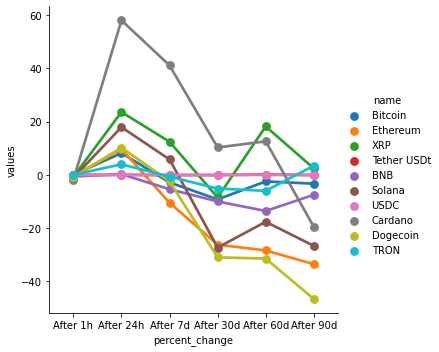

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')

Biểu đồ trên thể hiện tỷ lệ phần trăm thay đổi giá của các đồng tiền số ở thời điểm hiện tại so với các mốc thời gian trước đó. Ta có thể thấy rằng:
- Tether USDt và USDC hầu như không thay đổi giá trị theo thời gian. 
- Bitcoin, TRON ít có sự biến động về giá.
- Dogecoin, Etherum, Solana đã bị mất giá trị so với khoảng thời gian kể từ 1 tháng trước.
- Solana đang tăng giá trong thời gian gần đây.

In [51]:
df_price = df[['name','quote.USD.price','last_updated']]
df_price

,name,quote.USD.price,last_updated
0,Bitcoin,92973.111,2025-03-03T06:20:00.000Z
1,Ethereum,2434.532,2025-03-03T06:19:00.000Z
2,XRP,2.790,2025-03-03T06:20:00.000Z
3,Tether USDt,1.000,2025-03-03T06:20:00.000Z
4,BNB,609.323,2025-03-03T06:20:00.000Z
5,Solana,168.189,2025-03-03T06:20:00.000Z
6,USDC,1.000,2025-03-03T06:20:00.000Z
7,Cardano,1.046,2025-03-03T06:20:00.000Z
8,Dogecoin,0.226,2025-03-03T06:20:00.000Z
9,TRON,0.243,2025-03-03T06:20:00.000Z


Trong các loại crypto trên, thì:
- Bitcoin có giá trị cao nhất, 1 BTC xấp xỉ bằng 93000 USD. Etherum cũng là đồng tiền số có giá trị cao.
- 1 Tether USDt hay USDC có giá trị tương đương với 1 USD.